In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from time import time
import itertools

from aquaponics import Aquaponics

In [2]:
def run_gridpoint(T, I, disp=False):
    a = Aquaponics('hydroplant', N0=0.1, T0=T, I0=I)
    m = a.get_model()

    tf = 45
    steps = tf * 10 + 1
    m.time = np.linspace(0,tf,steps)

    a.solve(glamdring=True, imode=7, disp=disp)
    
    return m.options.APPSTATUS, a.w.value[-1], m, a

In [16]:
Tmin = 16
Tmax = 40
Tstep = 1
Ts = np.arange(Tmin, Tmax + Tstep, Tstep)
Imin = 4
Imax = 18
Istep = 1
Is = np.arange(Imin, Imax + Istep, Istep)
exps = list(itertools.product(Ts, Is))
print('Number of T\'s: {}'.format(len(Ts)))
print('Number of I\'s: {}'.format(len(Is)))
print('Number of Experiments: {}'.format(len(exps)))
print('----')

rs = {}
for i, exp in enumerate(exps):
    T = exp[0]
    I = exp[1]
    sys.stdout.write('\rRunning T={:.1f}, I={:.1f} ({}/{})'.format(T, I, i + 1, len(exps)))
    
    status, obj, m, a = run_gridpoint(T, I * 1e6, disp=False)
    if status == 1:
        sub = rs.get(T, {})
        sub[I] = obj
        rs[T] = sub
    
print('\nDone')

Number of T's: 25
Number of I's: 15
Number of Experiments: 375
----
Running T=40.0, I=18.0 (375/375)
Done


In [17]:
grid = np.zeros((len(Ts), len(Is)))
for Ti, T in enumerate(Ts):
    for Ii, I in enumerate(Is):
        grid[Ti, Ii] = rs.get(T, {}).get(I, 0)   

print(grid)

[[28.81482 28.94227 29.02392 29.08359 29.13009 29.16774 29.19904 29.22557
  29.24839 29.26827 29.28576 29.30129 29.31517 29.32766 29.33896]
 [28.86194 28.99495 29.07824 29.13851 29.18526 29.22303 29.2544  29.28095
  29.30379 29.32368 29.34117 29.3567  29.37057 29.38306 29.39436]
 [28.90393 29.0433  29.12858 29.18957 29.23663 29.27455 29.30599 29.33259
  29.35545 29.37534 29.39284 29.40837 29.42224 29.43473 29.44603]
 [28.94059 29.08701 29.1747  29.23658 29.28403 29.32213 29.35366 29.38032
  29.40321 29.42312 29.44063 29.45616 29.47003 29.48252 29.49382]
 [28.97203 29.12592 29.2165  29.27949 29.32743 29.36577 29.39743 29.42415
  29.44709 29.46703 29.48455 29.50009 29.51397 29.52646 29.53776]
 [28.9986  29.16004 29.25399 29.31837 29.36693 29.40558 29.43741 29.46423
  29.48723 29.5072  29.52475 29.54031 29.55421 29.5667  29.57801]
 [29.02088 29.1895  29.28725 29.35335 29.40269 29.44175 29.4738  29.50075
  29.52383 29.54386 29.56145 29.57703 29.59094 29.60345 29.61477]
 [29.03949 29.21461 

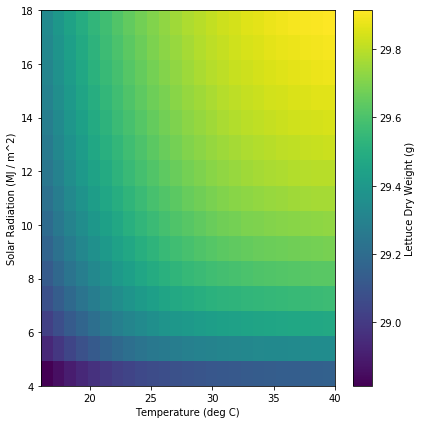

In [19]:
plt.figure(figsize=(6,6))
im = plt.imshow(grid.T, extent=[Tmin, Tmax, Imin, Imax], origin='lower')
ax = plt.gca()
ax.set_aspect('auto')
cb = plt.colorbar(im, ax=ax)
cb.set_label('Lettuce Dry Weight (g)')
plt.ylabel('Solar Radiation (MJ / m^2)')
plt.xlabel('Temperature (deg C)')
plt.tight_layout(h_pad=1)

In [24]:
print((grid.max() - grid.min()) )
print((grid.max() - grid.min()) / grid.min())

1.0980500000000006
0.038107126818768974
